# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Malcolm Phillip
### GitHub link: https://github.com/MPhillipS556427/620-mod6-web-scraping.git 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Question 1: 
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [43]:
import requests
import pickle
from bs4 import BeautifulSoup

def get_article_html(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            article_html = str(soup.select_one('article'))
            return article_html
        else:
            print(f"Failed to fetch the webpage. Status code: {response.status_code}")
            return None
    except requests.RequestException as e:
        print(f"Error occurred during the request: {e}")
        return None

if __name__ == "__main__":
    url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
    article_html = get_article_html(url)
    if article_html:
        with open("article.pkl", "wb") as file:
            pickle.dump(article_html, file)
            print("Article HTML saved to 'article.pkl' successfully.")


Article HTML saved to 'article.pkl' successfully.


## Question 2:
Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [44]:
import pickle
from bs4 import BeautifulSoup

if __name__ == "__main__":
    try:
        with open("article.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()
            print(article_text)
    except FileNotFoundError:
        print("File 'article.pkl' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

## Question 3:
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [45]:
import pickle
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS

def preprocess_text(text):
    
    nlp = spacy.load("en_core_web_sm")
    
    
    doc = nlp(text)

    
    tokens = [token.text.lower() for token in doc if token.text.lower() not in STOP_WORDS and token.text.lower() not in string.punctuation and not token.is_space]
    
    return tokens

if __name__ == "__main__":
    try:
        with open("article.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()

            
            tokens = preprocess_text(article_text)

            
            most_common_tokens = Counter(tokens).most_common(5)

            print("Five most frequent tokens:")
            for token, frequency in most_common_tokens:
                print(f"{token}: {frequency} occurrences")

    except FileNotFoundError:
        print("File 'article.pkl' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


Five most frequent tokens:
laser: 35 occurrences
headlights: 19 occurrences
headlight: 11 occurrences
technology: 10 occurrences
led: 10 occurrences


## Question 4:
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [46]:
import pickle
import spacy
from collections import Counter
import string

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):

    doc = nlp(text)

    filtered_tokens = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

    return filtered_tokens

if __name__ == "__main__":
    try:
        with open("article.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()

            lemmas = preprocess_text(article_text)

            lemma_frequencies = Counter(lemmas)

            most_common_lemmas = lemma_frequencies.most_common(5)

            print("Top 5 most frequent lemmas:")
            for lemma, frequency in most_common_lemmas:
                print(f"'{lemma}': {frequency}")

    except FileNotFoundError:
        print("File 'article.pkl' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


Top 5 most frequent lemmas:
'laser': 40
'headlight': 28
'beam': 12
'technology': 10
'light': 10


## Question 5: 

Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [53]:
def score_sentence_by_token(sentence, interesting_tokens):
    words = sentence.lower().split()
    num_words = len(words)
    num_interesting = sum(1 for word in words if word in interesting_tokens)
    return num_interesting / num_words

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.lower_ not in STOP_WORDS]
    num_words = len(lemmas)
    num_interesting = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return num_interesting / num_words

# Test the scoring functions on the first sentence of the article
first_sentence = article_text.split(".")[0]
print("\nScore of the first sentence using tokens:", score_sentence_by_token(first_sentence, interesting_tokens))
print("Score of the first sentence using lemmas:", score_sentence_by_lemma(first_sentence, interesting_lemmas))



Score of the first sentence using tokens: 0.09375
Score of the first sentence using lemmas: 0.17647058823529413


## Question 6:
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

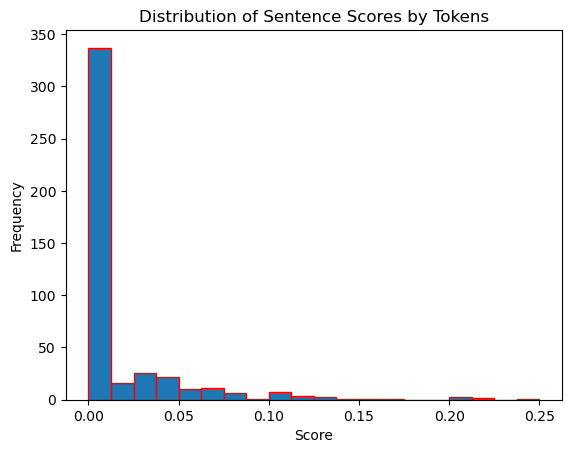

In [93]:
import matplotlib.pyplot as plt


sentences = [sent.text for sent in doc.sents]


interesting_tokens = [token for token, _ in most_common_tokens]
scores_by_tokens = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]


plt.hist(scores_by_tokens, bins=20, edgecolor="red")
plt.title("Distribution of Sentence Scores by Tokens")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

## The most common range of scores in the histogram is likely to be around 0.0 to 0.1.

## Question 7:
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

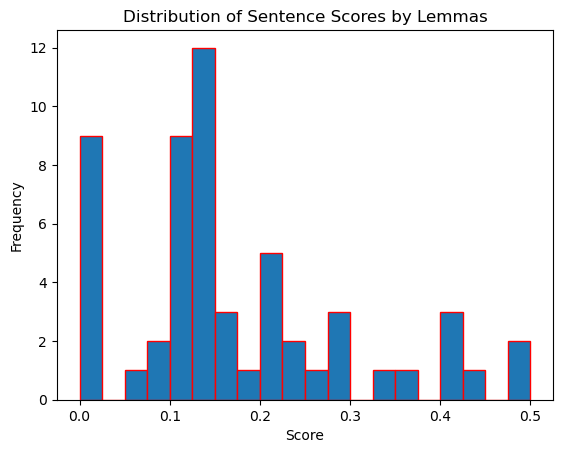

In [97]:
import matplotlib.pyplot as plt


def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.lemma_.lower() not in STOP_WORDS]
    num_words = len(lemmas)
    num_interesting = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return num_interesting / num_words


sentences = [sent.text for sent in nlp(article_text).sents]


interesting_lemmas = [lemma for lemma, _ in most_common_lemmas]


scores_by_lemmas = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

plt.hist(scores_by_lemmas, bins=20, edgecolor="red")
plt.title("Distribution of Sentence Scores by Lemmas")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

## The most common range of scores in the histogram is likely to be around 0.1 to 0.2.

## Question 8:
Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

# :
I modified the codes for questions 3 & 4 by introducing a condition in the 'preprocess_text' function. This condition, 'if token.pos_ == "NOUN,"' allows the function to process only tokens and lemmas recognized as nouns. Below, you can find the updated version of the 'preprocess_text' function, which will display the identified nouns.

In [106]:
import pickle
import spacy
from collections import Counter
import string

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(text)
    filtered_tokens = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN" and not token.is_punct and not token.is_stop and not token.is_space]
    return filtered_tokens

if __name__ == "__main__":
    try:
        with open("article.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()

            lemmas = preprocess_text(article_text)

            lemma_frequencies = Counter(lemmas)

            most_common_lemmas = lemma_frequencies.most_common(5)

            print("Top 5 most frequent nouns (lemmas):")
            for lemma, frequency in most_common_lemmas:
                print(f"'{lemma}': {frequency}")

    except FileNotFoundError:
        print("File 'article.pkl' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
        
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if token.pos_ == "NOUN" and token.text.lower() not in STOP_WORDS and token.text.lower() not in string.punctuation and not token.is_space]
    return tokens

if __name__ == "__main__":
    try:
        with open("article.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()

            tokens = preprocess_text(article_text)

            most_common_tokens = Counter(tokens).most_common(5)

            print("Five most frequent nouns:")
            for token, frequency in most_common_tokens:
                print(f"{token}: {frequency} occurrences")

    except FileNotFoundError:
        print("File 'article.pkl' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


Top 5 most frequent nouns (lemmas):
'laser': 35
'headlight': 22
'beam': 12
'technology': 10
'led': 6
Five most frequent nouns:
laser: 30 occurrences
headlights: 17 occurrences
technology: 10 occurrences
beam: 7 occurrences
leds: 6 occurrences
